In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
import platform

In [29]:
wine = pd.read_csv('C:/Users/하혜영/Downloads/분류모델_데이터1.csv')

In [30]:
wine.head()

,sd_sgg_nm,over_sch,all_sch,population,student,teacher,employee,birth_rate,S_edu,S_culture,...,apartment,fast_food,st_density,el_density,mi_density,hi_density,avg_teach,over_rate,area_km2,sch_area
0,1,14,125,817449,80236,5922,2109,0.745,1805,225,...,194,145,0.098154,0.486988,0.255322,0.257690,47.37600,0.11200,53.45196,2.33855
1,2,7,48,191363,23014,1796,831,0.976,380,104,...,80,33,0.120264,0.498610,0.248588,0.252803,37.41667,0.14583,404.40000,0.11869
2,3,2,40,194154,22334,1662,725,0.795,521,108,...,79,32,0.115032,0.462479,0.263947,0.273574,41.55000,0.05000,122.59000,0.32629
3,4,8,52,266196,31607,2360,1022,0.968,578,163,...,118,63,0.118736,0.508273,0.246559,0.245167,45.38462,0.15385,198.30000,0.26223
4,5,5,42,193997,24513,1792,817,1.075,378,124,...,72,47,0.126358,0.532085,0.248154,0.219761,42.66667,0.11905,215.00000,0.19535


In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sd_sgg_nm   250 non-null    int64  
 1   over_sch    250 non-null    int64  
 2   all_sch     250 non-null    int64  
 3   population  250 non-null    int64  
 4   student     250 non-null    int64  
 5   teacher     250 non-null    int64  
 6   employee    250 non-null    int64  
 7   birth_rate  250 non-null    float64
 8   S_edu       250 non-null    int64  
 9   S_culture   250 non-null    int64  
 10  S_life      250 non-null    int64  
 11  S_INFRA     250 non-null    int64  
 12  academy     250 non-null    int64  
 13  library     250 non-null    int64  
 14  bookstore   250 non-null    int64  
 15  sportsisul  250 non-null    int64  
 16  concert     250 non-null    int64  
 17  museum_art  250 non-null    int64  
 18  cinema      250 non-null    int64  
 19  park        250 non-null    i

In [32]:
wine.shape

(250, 32)

In [33]:
if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')

<AxesSubplot:xlabel='over_sch', ylabel='sd_name'>

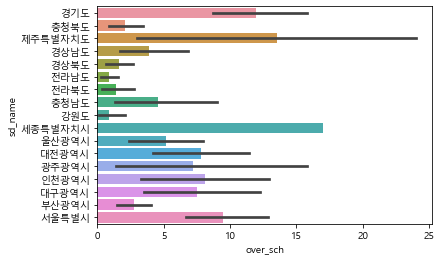

In [22]:
sns.barplot(x ='over_sch', y ='sd_name', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


over_sch      1.000000
student       0.903322
over_rate     0.885877
S_INFRA       0.842448
S_life        0.841818
teacher       0.834267
S_edu         0.817117
population    0.816459
academy       0.810840
big_mart      0.799619
small_mart    0.799118
apartment     0.792849
employee      0.791750
all_sch       0.733007
library       0.731769
bookstore     0.716569
fast_food     0.700119
st_density    0.628801
avg_teach     0.609340
S_culture     0.567938
park          0.520455
cinema        0.470672
sportsisul    0.388012
el_density    0.339208
sd_sgg_nm     0.268184
sch_area      0.253384
museum_art    0.185760
concert       0.082269
mi_density   -0.067451
birth_rate   -0.217790
area_km2     -0.269996
hi_density   -0.402179
Name: over_sch, dtype: float64

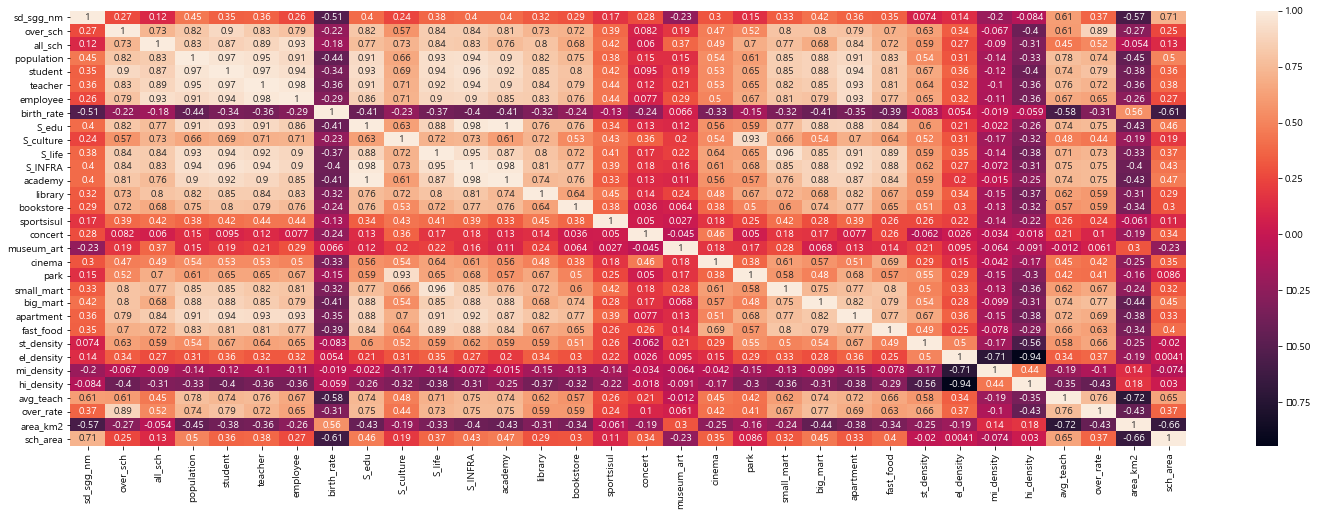

In [34]:
correlation  = wine.corr()
plt.figure(figsize=(25,8))
sns.heatmap(correlation,annot = True)       # Here annot= True write data value to each box
cor = wine.corr()
cor['over_sch'].sort_values(ascending=False)

In [68]:
from sklearn.model_selection import train_test_split
X = wine.drop('student', axis = 1)
Y = wine['over_sch']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 50)

In [69]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [70]:
#데이터 표준화 작업
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [71]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [72]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred_tr))

Accuracy: 0.27


In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [38]:
import sklearn.linear_model as sk
learn = sk.LogisticRegression();          #initializing linear regression model
learn.fit(X_train,Y_train);          #training the linear regression model
y_predicted = learn.predict(X_test)
score = learn.score(X_test,Y_test);    #testing the linear regression model
print (score)

0.4533333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
SVM = SVC()
SVM.fit(X_train,Y_train)
SVM.score(X_test,Y_test)

0.48

In [61]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.5333333333333333

In [41]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
score=rfc.score(X_test,Y_test)
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.41      0.88      0.56         8
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.50      0.14      0.22         7
           6       0.20      0.67      0.31         3
           7       0.17      0.50      0.25         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
